In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import sklearn 
import matplotlib.pyplot as plt
%matplotlib inline

## Load and Preliminary Explore the Dataset

In [2]:
#load in the datafile
housing = pd.read_csv('nyc-rolling-sales.csv')

In [3]:
#how many rows and columns?
print(housing.shape)

#print first five rows
housing.head()

(84548, 22)


,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,...,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19 00:00:00
1,5,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,,C7,234 EAST 4TH STREET,...,28,3,31,4616,18690,1900,2,C7,-,2016-12-14 00:00:00
2,6,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,,C7,197 EAST 3RD STREET,...,16,1,17,2212,7803,1900,2,C7,-,2016-12-09 00:00:00
3,7,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,,C4,154 EAST 7TH STREET,...,10,0,10,2272,6794,1913,2,C4,3936272,2016-09-23 00:00:00
4,8,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,,C2,301 EAST 10TH STREET,...,6,0,6,2369,4615,1900,2,C2,8000000,2016-11-17 00:00:00


In [4]:
#general summary of dataset
housing.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,84548.0,10344.359878,7151.779436,4.0,4231.00,8942.0,15987.25,26739.0
BOROUGH,84548.0,2.998758,1.289790,1.0,2.00,3.0,4.00,5.0
BLOCK,84548.0,4237.218976,3568.263407,1.0,1322.75,3311.0,6281.00,16322.0
LOT,84548.0,376.224015,658.136814,1.0,22.00,50.0,1001.00,9106.0
ZIP CODE,84548.0,10731.991614,1290.879147,0.0,10305.00,11209.0,11357.00,11694.0
RESIDENTIAL UNITS,84548.0,2.025264,16.721037,0.0,0.00,1.0,2.00,1844.0
COMMERCIAL UNITS,84548.0,0.193559,8.713183,0.0,0.00,0.0,0.00,2261.0
TOTAL UNITS,84548.0,2.249184,18.972584,0.0,1.00,1.0,2.00,2261.0
YEAR BUILT,84548.0,1789.322976,537.344993,0.0,1920.00,1940.0,1965.00,2017.0
TAX CLASS AT TIME OF SALE,84548.0,1.657485,0.819341,1.0,1.00,2.0,2.00,4.0


There are currently 84,548 rows or observations in this housing dataset.

## Data Cleaning

In [5]:
#drop unnecessary column 
housing.drop(columns = ['Unnamed: 0'], inplace = True)

### Check Variable Types

In [6]:
#types of data for each column
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84548 entries, 0 to 84547
Data columns (total 21 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   BOROUGH                         84548 non-null  int64 
 1   NEIGHBORHOOD                    84548 non-null  object
 2   BUILDING CLASS CATEGORY         84548 non-null  object
 3   TAX CLASS AT PRESENT            84548 non-null  object
 4   BLOCK                           84548 non-null  int64 
 5   LOT                             84548 non-null  int64 
 6   EASE-MENT                       84548 non-null  object
 7   BUILDING CLASS AT PRESENT       84548 non-null  object
 8   ADDRESS                         84548 non-null  object
 9   APARTMENT NUMBER                84548 non-null  object
 10  ZIP CODE                        84548 non-null  int64 
 11  RESIDENTIAL UNITS               84548 non-null  int64 
 12  COMMERCIAL UNITS                84548 non-null

### Converting Datatype Variables
I will need to convert the datatypes for the above datatypes to their appropriate classification. Some columns such as SALE PRICE is considered an object when it should be an float. And other columns such as NEIGHBORHOOD should be a categorical datatype rather than an object.

This dataset only contains object and integer dtypes.

In [7]:
# Identify object columns
print(housing.select_dtypes(['object']).columns)

Index(['NEIGHBORHOOD', 'BUILDING CLASS CATEGORY', 'TAX CLASS AT PRESENT',
       'EASE-MENT', 'BUILDING CLASS AT PRESENT', 'ADDRESS', 'APARTMENT NUMBER',
       'LAND SQUARE FEET', 'GROSS SQUARE FEET',
       'BUILDING CLASS AT TIME OF SALE', 'SALE PRICE', 'SALE DATE'],
      dtype='object')


In [8]:
# Identify integer columns
print(housing.select_dtypes(['int64']).columns)

Index(['BOROUGH', 'BLOCK', 'LOT', 'ZIP CODE', 'RESIDENTIAL UNITS',
       'COMMERCIAL UNITS', 'TOTAL UNITS', 'YEAR BUILT',
       'TAX CLASS AT TIME OF SALE'],
      dtype='object')


In [9]:
# Convert objects to categorical variables
obj_cats = ['NEIGHBORHOOD', 'BUILDING CLASS CATEGORY', 'TAX CLASS AT PRESENT',
       'EASE-MENT', 'BUILDING CLASS AT PRESENT', 'ADDRESS', 'APARTMENT NUMBER',
       'BUILDING CLASS AT TIME OF SALE']

for colname in obj_cats:
    housing[colname] = housing[colname].astype('category')  

In [10]:
# Convert numeric to categorical variables
num_cats = ['BOROUGH', 'BLOCK', 'LOT', 'ZIP CODE',
            'TAX CLASS AT TIME OF SALE']

for colname in num_cats:
    housing[colname] = housing[colname].astype('category')  

In [11]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84548 entries, 0 to 84547
Data columns (total 21 columns):
 #   Column                          Non-Null Count  Dtype   
---  ------                          --------------  -----   
 0   BOROUGH                         84548 non-null  category
 1   NEIGHBORHOOD                    84548 non-null  category
 2   BUILDING CLASS CATEGORY         84548 non-null  category
 3   TAX CLASS AT PRESENT            84548 non-null  category
 4   BLOCK                           84548 non-null  category
 5   LOT                             84548 non-null  category
 6   EASE-MENT                       84548 non-null  category
 7   BUILDING CLASS AT PRESENT       84548 non-null  category
 8   ADDRESS                         84548 non-null  category
 9   APARTMENT NUMBER                84548 non-null  category
 10  ZIP CODE                        84548 non-null  category
 11  RESIDENTIAL UNITS               84548 non-null  int64   
 12  COMMERCIAL UNITS  

In [12]:
#getting an error where I cannot convert the object types into integers using astype function
#convert object type to integer using pd.to_numeric & set errors to 'coerce'; ie. changes to NaN

numer = ['LAND SQUARE FEET','GROSS SQUARE FEET', 'SALE PRICE']
for col in numer: # coerce for missing values
    housing[col] = pd.to_numeric(housing[col], errors='coerce')

In [13]:
# Convert to date object
housing['SALE DATE'] = pd.to_datetime(housing['SALE DATE'])

In [14]:
#check dataframe
housing.head()

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,,...,5,0,5,1633.0,6440.0,1900,2,C2,6625000.0,2017-07-19
1,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,,C7,234 EAST 4TH STREET,,...,28,3,31,4616.0,18690.0,1900,2,C7,NaN,2016-12-14
2,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,,C7,197 EAST 3RD STREET,,...,16,1,17,2212.0,7803.0,1900,2,C7,NaN,2016-12-09
3,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,,C4,154 EAST 7TH STREET,,...,10,0,10,2272.0,6794.0,1913,2,C4,3936272.0,2016-09-23
4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,,C2,301 EAST 10TH STREET,,...,6,0,6,2369.0,4615.0,1900,2,C2,8000000.0,2016-11-17


In [15]:
#check dtypes
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84548 entries, 0 to 84547
Data columns (total 21 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   BOROUGH                         84548 non-null  category      
 1   NEIGHBORHOOD                    84548 non-null  category      
 2   BUILDING CLASS CATEGORY         84548 non-null  category      
 3   TAX CLASS AT PRESENT            84548 non-null  category      
 4   BLOCK                           84548 non-null  category      
 5   LOT                             84548 non-null  category      
 6   EASE-MENT                       84548 non-null  category      
 7   BUILDING CLASS AT PRESENT       84548 non-null  category      
 8   ADDRESS                         84548 non-null  category      
 9   APARTMENT NUMBER                84548 non-null  category      
 10  ZIP CODE                        84548 non-null  category      
 11  RE

### Renaming and further organization of the dataset

In [16]:
# remove space and add _ character for ease of processing 
housing.columns = housing.columns.str.replace(' ', '_')

In [17]:
#make column names lowercase for ease of readability and further processing
housing.columns= housing.columns.str.lower()
housing.columns

Index(['borough', 'neighborhood', 'building_class_category',
       'tax_class_at_present', 'block', 'lot', 'ease-ment',
       'building_class_at_present', 'address', 'apartment_number', 'zip_code',
       'residential_units', 'commercial_units', 'total_units',
       'land_square_feet', 'gross_square_feet', 'year_built',
       'tax_class_at_time_of_sale', 'building_class_at_time_of_sale',
       'sale_price', 'sale_date'],
      dtype='object')

In [18]:
#create a new column for age of the unit
housing['age'] = 2021 - housing['year_built']

#is the building pre or post war?
housing['age_category'] = np.where(housing['age']>=76,'Pre-War','Post-War')

# Convert to Category
housing['age_category'] = housing['age_category'].astype('category')

housing

,borough,neighborhood,building_class_category,tax_class_at_present,block,lot,ease-ment,building_class_at_present,address,apartment_number,...,total_units,land_square_feet,gross_square_feet,year_built,tax_class_at_time_of_sale,building_class_at_time_of_sale,sale_price,sale_date,age,age_category
0,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,,...,5,1633.0,6440.0,1900,2,C2,6625000.0,2017-07-19,121,Pre-War
1,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,,C7,234 EAST 4TH STREET,,...,31,4616.0,18690.0,1900,2,C7,NaN,2016-12-14,121,Pre-War
2,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,,C7,197 EAST 3RD STREET,,...,17,2212.0,7803.0,1900,2,C7,NaN,2016-12-09,121,Pre-War
3,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,,C4,154 EAST 7TH STREET,,...,10,2272.0,6794.0,1913,2,C4,3936272.0,2016-09-23,108,Pre-War
4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,,C2,301 EAST 10TH STREET,,...,6,2369.0,4615.0,1900,2,C2,8000000.0,2016-11-17,121,Pre-War
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84543,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,34,,B9,37 QUAIL LANE,,...,2,2400.0,2575.0,1998,1,B9,450000.0,2016-11-28,23,Post-War
84544,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,78,,B9,32 PHEASANT LANE,,...,2,2498.0,2377.0,1998,1,B9,550000.0,2017-04-21,23,Post-War
84545,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7351,60,,B2,49 PITNEY AVENUE,,...,2,4000.0,1496.0,1925,1,B2,460000.0,2017-07-05,96,Pre-War
84546,5,WOODROW,22 STORE BUILDINGS,4,7100,28,,K6,2730 ARTHUR KILL ROAD,,...,7,208033.0,64117.0,2001,4,K6,11693337.0,2016-12-21,20,Post-War


In [19]:
#set numerical indicators for boroughs as type str to distinguish boroughs  
housing['borough'] = housing['borough'].astype(str)
housing['borough'] = housing['borough'].str.replace("1", "Manhattan")
housing['borough'] = housing['borough'].str.replace("2", "Bronx")
housing['borough'] = housing['borough'].str.replace("3", "Brooklyn")
housing['borough'] = housing['borough'].str.replace("4", "Queens")
housing['borough'] = housing['borough'].str.replace("5", "Staten Island")

## Missing Values

In [20]:
# Count of missing values
housing.isnull().sum()

borough                               0
neighborhood                          0
building_class_category               0
tax_class_at_present                  0
block                                 0
lot                                   0
ease-ment                             0
building_class_at_present             0
address                               0
apartment_number                      0
zip_code                              0
residential_units                     0
commercial_units                      0
total_units                           0
land_square_feet                  26252
gross_square_feet                 27612
year_built                            0
tax_class_at_time_of_sale             0
building_class_at_time_of_sale        0
sale_price                        14561
sale_date                             0
age                                   0
age_category                          0
dtype: int64

In [21]:
# Percentage of missing values
housing.isnull().sum()/len(housing)*100

borough                            0.000000
neighborhood                       0.000000
building_class_category            0.000000
tax_class_at_present               0.000000
block                              0.000000
lot                                0.000000
ease-ment                          0.000000
building_class_at_present          0.000000
address                            0.000000
apartment_number                   0.000000
zip_code                           0.000000
residential_units                  0.000000
commercial_units                   0.000000
total_units                        0.000000
land_square_feet                  31.049818
gross_square_feet                 32.658372
year_built                         0.000000
tax_class_at_time_of_sale          0.000000
building_class_at_time_of_sale     0.000000
sale_price                        17.222170
sale_date                          0.000000
age                                0.000000
age_category                    

Overall, the dataset is generally in good shape when it comes to missing values. There are however, missing values for the land (31%) and gross square feet (33%) of the housing units. Additionally, sale prices (17%) are missing.

This may be explained by the following for the context and content description for the dataset below:

- Many sales occur with a nonsensically small dollar amount: $0 most commonly. These sales are actually transfers of deeds between parties: for example, parents transferring ownership to their home to a child after moving out for retirement.
- This dataset uses the financial definition of a building/building unit, for tax purposes. In case a single entity owns the building in question, a sale covers the value of the entire building. In case a building is owned piecemeal by its residents (a condominium), a sale refers to a single apartment (or group of apartments) owned by some individual.

Since the missing values can be explained by the above notes and to allow for a more complete analysis, I will proceed with dropping the missing values from the housing dataset.

In [22]:
# Remove rows missing data
housing = housing.dropna()

In [23]:
# Recheck the count of missing values
housing.isnull().sum()

borough                           0
neighborhood                      0
building_class_category           0
tax_class_at_present              0
block                             0
lot                               0
ease-ment                         0
building_class_at_present         0
address                           0
apartment_number                  0
zip_code                          0
residential_units                 0
commercial_units                  0
total_units                       0
land_square_feet                  0
gross_square_feet                 0
year_built                        0
tax_class_at_time_of_sale         0
building_class_at_time_of_sale    0
sale_price                        0
sale_date                         0
age                               0
age_category                      0
dtype: int64

In [24]:
#convert from scientific notation to describe dataset
housing.describe().apply(lambda s: s.apply('{0:.5f}'.format)).transpose()

,count,mean,std,min,25%,50%,75%,max
residential_units,48244.00000,2.56654,17.46548,0.00000,1.00000,1.00000,2.00000,1844.00000
commercial_units,48244.00000,0.24917,10.98807,0.00000,0.00000,0.00000,0.00000,2261.00000
total_units,48244.00000,2.83463,20.75042,0.00000,1.00000,1.00000,2.00000,2261.00000
land_square_feet,48244.00000,3358.11655,31435.89670,0.00000,1413.00000,2140.00000,3071.00000,4228300.00000
gross_square_feet,48244.00000,3669.75253,29474.91185,0.00000,828.00000,1620.00000,2520.00000,3750565.00000
year_built,48244.00000,1827.76517,464.36115,0.00000,1920.00000,1931.00000,1961.00000,2017.00000
sale_price,48244.00000,1153281.44582,13401309.19358,0.00000,80420.00000,480000.00000,830000.00000,2210000000.00000
age,48244.00000,193.23483,464.36115,4.00000,60.00000,90.00000,101.00000,2021.00000


There are minimum values of zero for columns that do not make sense. For example, year built has a minimum value of 0.

In [25]:
#check dataframe where year_built is 0 years
housing[housing['year_built']==0]

,borough,neighborhood,building_class_category,tax_class_at_present,block,lot,ease-ment,building_class_at_present,address,apartment_number,...,total_units,land_square_feet,gross_square_feet,year_built,tax_class_at_time_of_sale,building_class_at_time_of_sale,sale_price,sale_date,age,age_category
18364,Bronx,BATHGATE,29 COMMERCIAL GARAGES,4,2918,29,,G7,1885 BATHGATE AVENUE,,...,0,3070.0,0.0,0,4,G7,2500000.0,2016-12-15,2021,Pre-War
18371,Bronx,BATHGATE,31 COMMERCIAL VACANT LAND,4,3028,13,,V9,1996 WEBSTER AVENUE,,...,0,5945.0,0.0,0,4,V9,1200000.0,2016-10-19,2021,Pre-War
18373,Bronx,BATHGATE,41 TAX CLASS 4 - OTHER,4,2900,1,,Z9,1816 WEBSTER AVENUE,,...,0,3082.0,0.0,0,4,Z9,300000.0,2016-11-03,2021,Pre-War
18756,Bronx,BAYCHESTER,05 TAX CLASS 1 VACANT LAND,1B,4725,26,,V0,1475 HICKS STREET,,...,0,2375.0,0.0,0,1,V0,98000.0,2016-10-31,2021,Pre-War
18757,Bronx,BAYCHESTER,05 TAX CLASS 1 VACANT LAND,1B,4726,38,,V0,3552 EASTCHESTER ROAD,,...,0,3400.0,0.0,0,1,V0,0.0,2017-03-16,2021,Pre-War
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53841,Queens,CORONA,07 RENTALS - WALKUP APARTMENTS,2B,1785,22,,C1,112-48 38TH AVENUE,,...,8,2500.0,6875.0,0,2,C1,2153222.0,2017-05-10,2021,Pre-War
54054,Queens,CORONA,41 TAX CLASS 4 - OTHER,4,1961,1,,Z9,5506 VAN CLEEF STREET,,...,0,926.0,384.0,0,4,Z9,113000.0,2017-08-09,2021,Pre-War
57321,Queens,FLUSHING-NORTH,08 RENTALS - ELEVATOR APARTMENTS,2B,5186,56,,D3,142-11 CHERRY AVENUE,,...,10,2850.0,10111.0,0,2,D3,4000000.0,2017-05-19,2021,Pre-War
65906,Queens,LITTLE NECK,01 ONE FAMILY DWELLINGS,1,8229,80,,A3,45-39 BROWVALE LANE,,...,1,9562.0,5291.0,0,1,A3,1731025.0,2017-04-06,2021,Pre-War


Based on the condition set for the dataframe where year_built is less than 1, there are 2911 rows/observations where the year_built for the building is 0 years old.

Double-checking this below with a variable case condition confirms 2911 rows is correct.

In [26]:
#check how many cases where year_built is less than 1 
zero = housing[housing['year_built']==0] #create variable called zero with condition where year_built less than 1
count = zero.count() #count the cases of less than 1

print(count)

borough                           2911
neighborhood                      2911
building_class_category           2911
tax_class_at_present              2911
block                             2911
lot                               2911
ease-ment                         2911
building_class_at_present         2911
address                           2911
apartment_number                  2911
zip_code                          2911
residential_units                 2911
commercial_units                  2911
total_units                       2911
land_square_feet                  2911
gross_square_feet                 2911
year_built                        2911
tax_class_at_time_of_sale         2911
building_class_at_time_of_sale    2911
sale_price                        2911
sale_date                         2911
age                               2911
age_category                      2911
dtype: int64


In [27]:
#remove rows where year_built = 0
housing = housing[housing['year_built']!=0]

## Outliers

Similarly, lets check other values where land and gross square feet is zero as these may be potential outliers.

In [28]:
housing[housing['land_square_feet']==0]

,borough,neighborhood,building_class_category,tax_class_at_present,block,lot,ease-ment,building_class_at_present,address,apartment_number,...,total_units,land_square_feet,gross_square_feet,year_built,tax_class_at_time_of_sale,building_class_at_time_of_sale,sale_price,sale_date,age,age_category
18354,Bronx,BATHGATE,10 COOPS - ELEVATOR APARTMENTS,2,3035,48,,D4,"463 EAST 178TH STREET, 6E",,...,0,0.0,0.0,1935,2,D4,40000.0,2017-04-17,86,Pre-War
18355,Bronx,BATHGATE,10 COOPS - ELEVATOR APARTMENTS,2,3035,48,,D4,"463 EAST 178TH ST, 6B",,...,0,0.0,0.0,1935,2,D4,40000.0,2017-04-17,86,Pre-War
18356,Bronx,BATHGATE,10 COOPS - ELEVATOR APARTMENTS,2,3044,40,,D4,"495 E 178TH STREET, 2H",,...,0,0.0,0.0,1941,2,D4,60000.0,2016-12-01,80,Pre-War
18746,Bronx,BAYCHESTER,04 TAX CLASS 1 CONDOS,1A,4795,1009,,R3,2877 ELY AVENUE,3,...,1,0.0,0.0,2008,1,R3,310000.0,2017-02-28,13,Post-War
18747,Bronx,BAYCHESTER,04 TAX CLASS 1 CONDOS,1A,4795,1027,,R3,2853 ELY AVENUE,3,...,1,0.0,0.0,2008,1,R3,342500.0,2017-07-31,13,Post-War
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49292,Brooklyn,WINDSOR TERRACE,44 CONDO PARKING,4,5287,1035,,RP,207 PROSPECT PARK SW,P35,...,1,0.0,0.0,1990,4,RP,0.0,2017-07-25,31,Post-War
49293,Brooklyn,WINDSOR TERRACE,44 CONDO PARKING,4,5287,1035,,RP,207 PROSPECT PARK SW,P35,...,1,0.0,0.0,1990,4,RP,0.0,2017-07-17,31,Post-War
49294,Brooklyn,WINDSOR TERRACE,47 CONDO NON-BUSINESS STORAGE,4,895,1213,,RS,11 TERRACE PLACE,S2,...,1,0.0,0.0,2006,4,RS,0.0,2016-10-06,15,Post-War
49295,Brooklyn,WINDSOR TERRACE,47 CONDO NON-BUSINESS STORAGE,4,895,1219,,RS,11 TERRACE PLACE,S8,...,1,0.0,0.0,2006,4,RS,0.0,2016-10-24,15,Post-War


There are 8,345 rows where the land square feet is zero.

According to the definition in the glossary of terms; the Land Square Feet is the land area of the property listed in square feet. Based on this definition, it is not possible to have housing units with a land square feet of zero.

In [29]:
housing[housing['gross_square_feet']==0]

,borough,neighborhood,building_class_category,tax_class_at_present,block,lot,ease-ment,building_class_at_present,address,apartment_number,...,total_units,land_square_feet,gross_square_feet,year_built,tax_class_at_time_of_sale,building_class_at_time_of_sale,sale_price,sale_date,age,age_category
18354,Bronx,BATHGATE,10 COOPS - ELEVATOR APARTMENTS,2,3035,48,,D4,"463 EAST 178TH STREET, 6E",,...,0,0.0,0.0,1935,2,D4,40000.0,2017-04-17,86,Pre-War
18355,Bronx,BATHGATE,10 COOPS - ELEVATOR APARTMENTS,2,3035,48,,D4,"463 EAST 178TH ST, 6B",,...,0,0.0,0.0,1935,2,D4,40000.0,2017-04-17,86,Pre-War
18356,Bronx,BATHGATE,10 COOPS - ELEVATOR APARTMENTS,2,3044,40,,D4,"495 E 178TH STREET, 2H",,...,0,0.0,0.0,1941,2,D4,60000.0,2016-12-01,80,Pre-War
18746,Bronx,BAYCHESTER,04 TAX CLASS 1 CONDOS,1A,4795,1009,,R3,2877 ELY AVENUE,3,...,1,0.0,0.0,2008,1,R3,310000.0,2017-02-28,13,Post-War
18747,Bronx,BAYCHESTER,04 TAX CLASS 1 CONDOS,1A,4795,1027,,R3,2853 ELY AVENUE,3,...,1,0.0,0.0,2008,1,R3,342500.0,2017-07-31,13,Post-War
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49292,Brooklyn,WINDSOR TERRACE,44 CONDO PARKING,4,5287,1035,,RP,207 PROSPECT PARK SW,P35,...,1,0.0,0.0,1990,4,RP,0.0,2017-07-25,31,Post-War
49293,Brooklyn,WINDSOR TERRACE,44 CONDO PARKING,4,5287,1035,,RP,207 PROSPECT PARK SW,P35,...,1,0.0,0.0,1990,4,RP,0.0,2017-07-17,31,Post-War
49294,Brooklyn,WINDSOR TERRACE,47 CONDO NON-BUSINESS STORAGE,4,895,1213,,RS,11 TERRACE PLACE,S2,...,1,0.0,0.0,2006,4,RS,0.0,2016-10-06,15,Post-War
49295,Brooklyn,WINDSOR TERRACE,47 CONDO NON-BUSINESS STORAGE,4,895,1219,,RS,11 TERRACE PLACE,S8,...,1,0.0,0.0,2006,4,RS,0.0,2016-10-24,15,Post-War


There are 8,522 rows where the gross square feet is zero.

The Gross Square Feet is defined as the total area of all the floors of a building as measured from the exterior surfaces of the outside walls of the building, including the land area and space within any building or structure on the property.

Simiarly, it is not possible to have a gross square feet area of zero and shall be removed as such.

In [30]:
# Remove outliers of zero gross square feet and land square feet.
housing = housing[housing['land_square_feet']!=0]
housing = housing[housing['gross_square_feet']!=0]

# Confirm removals
housing.describe().apply(lambda s: s.apply('{0:.5f}'.format)).transpose()

,count,mean,std,min,25%,50%,75%,max
residential_units,36805.00000,3.18209,19.82145,0.00000,1.00000,2.00000,2.00000,1844.00000
commercial_units,36805.00000,0.32319,12.57908,0.00000,0.00000,0.00000,0.00000,2261.00000
total_units,36805.00000,3.50406,23.60379,0.00000,1.00000,2.00000,2.00000,2261.00000
land_square_feet,36805.00000,4197.33422,35778.41850,200.00000,2000.00000,2500.00000,3800.00000,4228300.00000
gross_square_feet,36805.00000,4790.49126,33637.49347,60.00000,1428.00000,2000.00000,2898.00000,3750565.00000
year_built,36805.00000,1939.07811,30.28128,1800.00000,1920.00000,1930.00000,1955.00000,2017.00000
sale_price,36805.00000,1305840.98310,15185705.88870,0.00000,160000.00000,504237.00000,840000.00000,2210000000.00000
age,36805.00000,81.92189,30.28128,4.00000,66.00000,91.00000,101.00000,221.00000


There are now a total of 36,805 observations in the housing dataset.

Upon checking for potentially additional outliers, there is reason to believe that the sale_price has a significant outlier. Creating a simple scatter plot confirms this as we have some crazy property prices with one sale price of over $2 billion dollars!

<AxesSubplot:xlabel='age', ylabel='sale_price'>

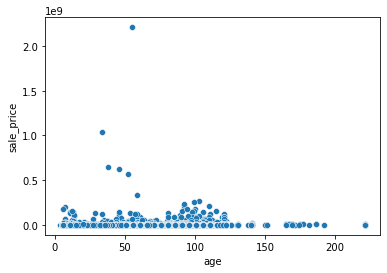

In [31]:
#simple scatter plot to find potential outliers
sns.scatterplot(data=housing, x="age", y="sale_price")

Lets remove these crazy outliers for the purposes of this analysis. Lets set a limit of $500,000,000

In [32]:
#remove outlier prices
housing = housing[housing['sale_price'] <500000000] 

<AxesSubplot:xlabel='age', ylabel='sale_price'>

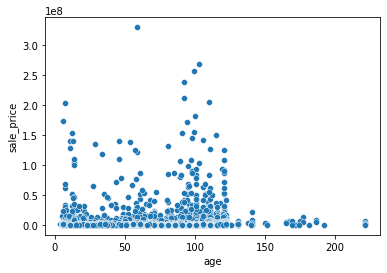

In [33]:
sns.scatterplot(data=housing, x="age", y="sale_price")

Even with the removal of housing prices greater than \\$500,000,000, there is still a vast amount of other housing units in NYC clustered below the \\$5,000,000 price point.

## Exploratory Data Analysis (EDA) & some more cleaning

With the new parameter limiting housing prices below $500,000,000, what does the distribution of the data look like?

/Users/widhardwiatmoko/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='sale_price', ylabel='Density'>

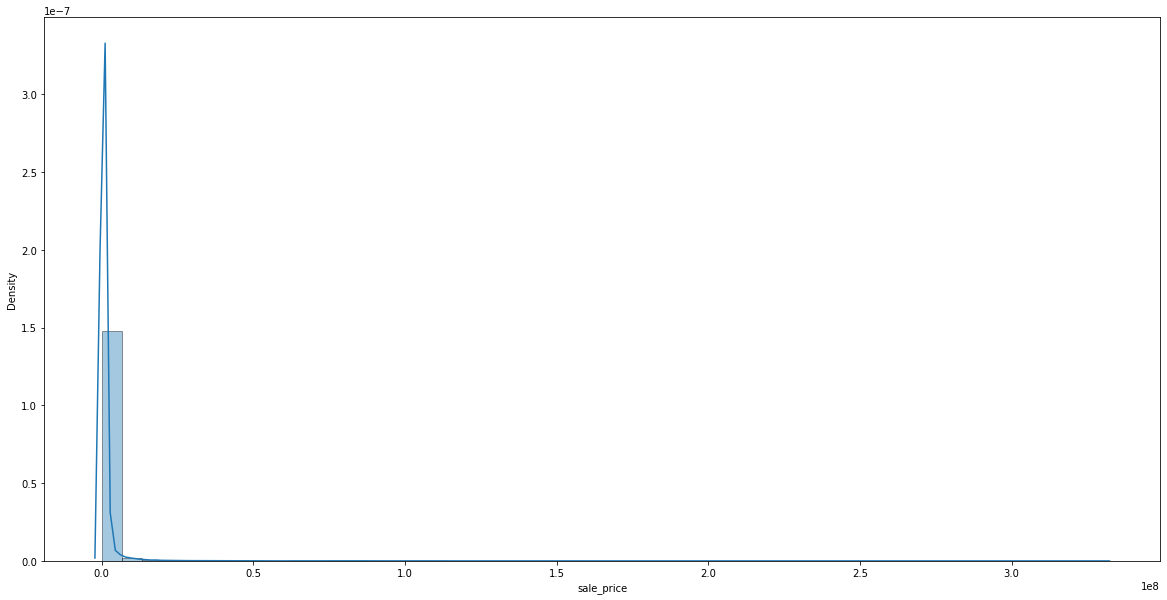

In [34]:
#create distribution plot of housing sale prices below $500,000,000
plt.figure(figsize = (20,10))
sns.distplot(housing['sale_price'], kde = True, hist_kws=dict(edgecolor="k"))


It is very crowded below the \\$5,000,000 price point as expected. Lets create a new limitation where the dataset will only include sale prices below \\$5,000,000.

In [35]:
#create new df where sale_price is below $5 mil. 
new_housing = housing[housing['sale_price'] <5000000] 

In [36]:
new_housing.describe().apply(lambda s: s.apply('{0:.5f}'.format)).transpose()

,count,mean,std,min,25%,50%,75%,max
residential_units,35693.00000,2.49181,14.71587,0.00000,1.00000,2.00000,2.00000,1844.00000
commercial_units,35693.00000,0.22439,12.08858,0.00000,0.00000,0.00000,0.00000,2261.00000
total_units,35693.00000,2.71515,19.13044,0.00000,1.00000,2.00000,2.00000,2261.00000
land_square_feet,35693.00000,3787.15518,31837.51462,200.00000,2000.00000,2500.00000,3645.00000,4228300.00000
gross_square_feet,35693.00000,3594.99821,27516.35693,60.00000,1408.00000,1970.00000,2772.00000,3750565.00000
year_built,35693.00000,1939.40375,30.22773,1800.00000,1920.00000,1930.00000,1955.00000,2017.00000
sale_price,35693.00000,605425.59171,657964.67148,0.00000,106500.00000,495000.00000,799000.00000,4975000.00000
age,35693.00000,81.59625,30.22773,4.00000,66.00000,91.00000,101.00000,221.00000


<AxesSubplot:xlabel='age', ylabel='sale_price'>

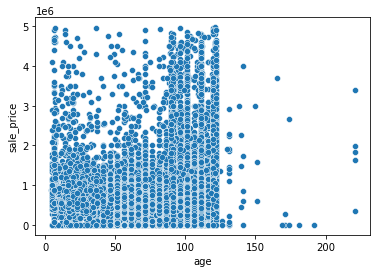

In [37]:
#check again
sns.scatterplot(data=new_housing, x="age", y="sale_price")


/Users/widhardwiatmoko/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='sale_price', ylabel='Density'>

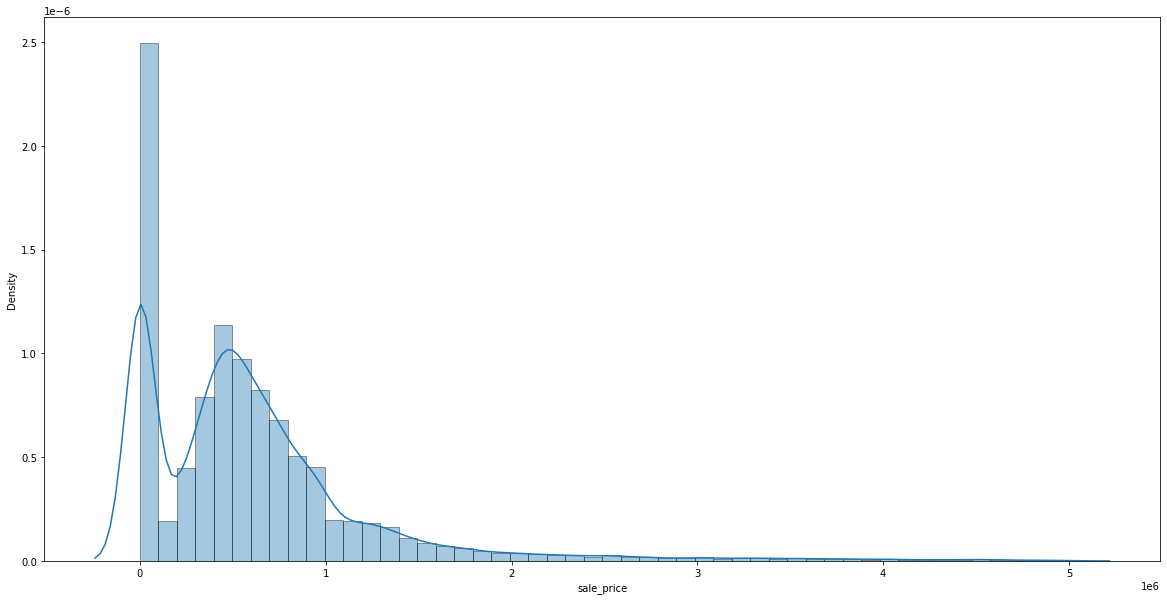

In [38]:
#create distribution plot of housing sale prices below $500,000,000
plt.figure(figsize = (20,10))
sns.distplot(new_housing['sale_price'], kde = True, hist_kws=dict(edgecolor="k"))

Still a bit crowded, but this gives a better idea of the distribution of sale prices. After removing outliers over \\$500,000,000, the sale price variable appears to be normally distributed and skewed to the right with the exception of the most frequent housing sale price approaching $0.

As explained earlier and as described as part of the dataset, "many sales occur with a nonsensically small dollar amount: $0 most commonly. These sales are actually transfers of deeds between parties: for example, parents transferring ownership to their home to a child after moving out for retirement."

Having understanding of this, lets further remove the sale of prices where sale_price = 0 and further confirm the distribution of sale prices in the NYC housing market.



In [39]:
#create new df where sale_price is not 0 and below $5 mil. 
new_housing = housing[(housing['sale_price'] <5000000) & (housing['sale_price'] != 0)] 

Lets check the new dataframe again and see if these changes have been made.

In [40]:
#check new df again
new_housing.describe().apply(lambda s: s.apply('{0:.5f}'.format)).transpose()


,count,mean,std,min,25%,50%,75%,max
residential_units,28207.00000,2.17109,13.33397,0.00000,1.00000,2.00000,2.00000,1844.00000
commercial_units,28207.00000,0.20470,13.51836,0.00000,0.00000,0.00000,0.00000,2261.00000
total_units,28207.00000,2.37462,19.07034,0.00000,1.00000,2.00000,2.00000,2261.00000
land_square_feet,28207.00000,3814.92076,35284.42440,200.00000,2000.00000,2500.00000,3880.00000,4228300.00000
gross_square_feet,28207.00000,3106.44152,26358.64327,120.00000,1348.00000,1827.00000,2530.00000,3750565.00000
year_built,28207.00000,1941.18194,30.44789,1800.00000,1920.00000,1930.00000,1960.00000,2017.00000
sale_price,28207.00000,766102.58606,651702.65398,1.00000,410000.00000,600000.00000,900000.00000,4975000.00000
age,28207.00000,79.81806,30.44789,4.00000,61.00000,91.00000,101.00000,221.00000


The new dataframe now incldues properties with sale prices not equal to 0 which is great. But there are some other potential outliers within the land_square_feet and gross_square_feet categories which may influence the other data points.

Plotting these points below confirms a few outliers.

What are these properties exactly? I'll create a filter to identify the maximum values for the `land_square_feet` and `gross_square_feet`.

<AxesSubplot:xlabel='land_square_feet', ylabel='sale_price'>

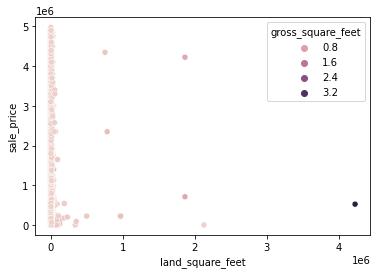

In [41]:
#quick plots of land_square_feet & gross_square_feet against price. 
sns.scatterplot(data=new_housing, x="land_square_feet", y="sale_price", hue = "gross_square_feet")

In [42]:
#creates a filter for land_square_feet where over 1,000,000 SF
land_filt = (new_housing['land_square_feet'] > 1000000)

#creates a filter for land_square_feet where over 1,000,000 SF
gross_filt = (new_housing['gross_square_feet'] > 1000000)

In [43]:
#check properties with land_square_feet > 1,000,000 SF
new_housing[land_filt]

,borough,neighborhood,building_class_category,tax_class_at_present,block,lot,ease-ment,building_class_at_present,address,apartment_number,...,total_units,land_square_feet,gross_square_feet,year_built,tax_class_at_time_of_sale,building_class_at_time_of_sale,sale_price,sale_date,age,age_category
61460,Queens,GLEN OAKS,10 COOPS - ELEVATOR APARTMENTS,2,8489,1,,D4,26910 GRAND CENTRAL PARKWA,,...,1866,4228300.0,3750565.0,1972,2,D4,525000.0,2017-07-05,49,Post-War
81334,Staten Island,NEW SPRINGVILLE,22 STORE BUILDINGS,4,2400,180,,K6,2655 RICHMOND AVENUE,,...,126,1865243.0,683200.0,1975,4,K6,711008.0,2017-03-17,46,Post-War
81335,Staten Island,NEW SPRINGVILLE,22 STORE BUILDINGS,4,2400,180,,K6,2655 RICHMOND AVENUE,,...,126,1865243.0,683200.0,1975,4,K6,4223025.0,2017-03-17,46,Post-War
83181,Staten Island,TODT HILL,33 EDUCATIONAL FACILITIES,4,683,1,,W1,715 OCEAN TERRACE,,...,1,2128899.0,240.0,1965,4,W1,1.0,2016-11-14,56,Post-War


In [44]:
#check properties with gross_square_feet > 1,000,000 SF
new_housing[gross_filt]

,borough,neighborhood,building_class_category,tax_class_at_present,block,lot,ease-ment,building_class_at_present,address,apartment_number,...,total_units,land_square_feet,gross_square_feet,year_built,tax_class_at_time_of_sale,building_class_at_time_of_sale,sale_price,sale_date,age,age_category
61460,Queens,GLEN OAKS,10 COOPS - ELEVATOR APARTMENTS,2,8489,1,,D4,26910 GRAND CENTRAL PARKWA,,...,1866,4228300.0,3750565.0,1972,2,D4,525000.0,2017-07-05,49,Post-War


A few interesting things to note once I created filters for the land and gross square feet of properties over 1,000,000 SF. As defined by the glossary of terms, the Gross Square Feet is the total area of all the floors of a building as measured from the exterior surfaces of the outside walls of the building, including the land area and space within any building or structure on the property.

When isolating the above properties, there are results yielding a gross square feet area LESS than the total land square feet area which should not be true. Thus, lets further remove these results as part of the dataframe set. Further, many outliers exist in the lower and upper bound of the distribution.I will set an upper bound of 75% for the dataset as maximum since 75th percentile of the dataset represents a good cutoff for majority of houses' square feet metrics.

There are also properties being sold at absurdly low prices (between \\$1 - \\$500). I'll further limit the dataset to include only properties greater than \\$1,000.

In [45]:
new_housing = housing[(housing['sale_price'] <5000000) #limit up to $5,000,000 
                       & (housing['sale_price'] > 1000) #removes all properties less than $1,000
                       & (housing['residential_units'] < 500) #limit up to 500 units
                       & (housing['commercial_units'] < 500) #limit up to 500 units
                       & (housing['land_square_feet'] < housing['gross_square_feet']) #removes instances where land sf is greater than gross sf
                       & (housing['gross_square_feet'] < 2530) #removes instances where gross sf is greater than 2530 SF
                       & (housing['gross_square_feet'] > 120)] #removes instances where gross sf is less than 120 SF

Additionally, there are duplicate values as evidenced by the property located at 2655 RICHMOND AVENUE. Lets also remove these values with the `.drop_duplicates` function.

In [46]:
#remove duplicates
new_housing.drop_duplicates()

,borough,neighborhood,building_class_category,tax_class_at_present,block,lot,ease-ment,building_class_at_present,address,apartment_number,...,total_units,land_square_feet,gross_square_feet,year_built,tax_class_at_time_of_sale,building_class_at_time_of_sale,sale_price,sale_date,age,age_category
1078,Manhattan,CHINATOWN,22 STORE BUILDINGS,4,162,47,,K4,10-14 DOYERS STREET,,...,4,892.0,1784.0,1920,4,K4,3000000.0,2017-07-31,101,Pre-War
4172,Manhattan,GREENWICH VILLAGE-WEST,01 ONE FAMILY DWELLINGS,1,585,69,,A5,2 GROVE COURT,,...,1,384.0,1152.0,1901,1,A5,1375000.0,2016-10-07,120,Pre-War
4174,Manhattan,GREENWICH VILLAGE-WEST,01 ONE FAMILY DWELLINGS,1,606,28,,S1,66 GREENWICH AVENUE,,...,2,925.0,2337.0,1910,1,S1,4065000.0,2017-08-03,111,Pre-War
4832,Manhattan,HARLEM-CENTRAL,02 TWO FAMILY DWELLINGS,1,1950,7,,B3,357 WEST 123 STREET,,...,2,1598.0,2340.0,1899,1,B3,2460000.0,2017-05-17,122,Pre-War
4881,Manhattan,HARLEM-CENTRAL,07 RENTALS - WALKUP APARTMENTS,2A,1726,22,,C3,35 WEST 128 STREET,,...,4,1249.0,2058.0,1910,2,C3,1431326.0,2017-08-07,111,Pre-War
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84486,Staten Island,WOODROW,01 ONE FAMILY DWELLINGS,1,7317,226,,A5,19 PEMBROOK LOOP,,...,1,1616.0,2137.0,1992,1,A5,417500.0,2016-11-15,29,Post-War
84487,Staten Island,WOODROW,01 ONE FAMILY DWELLINGS,1,7317,246,,A5,61 PEMBROOK LOOP,,...,1,1428.0,2206.0,1992,1,A5,470000.0,2017-05-04,29,Post-War
84488,Staten Island,WOODROW,01 ONE FAMILY DWELLINGS,1,7317,280,,A5,131 PEMBROOK LOOP,,...,1,1669.0,1828.0,1993,1,A5,425000.0,2017-07-10,28,Post-War
84489,Staten Island,WOODROW,01 ONE FAMILY DWELLINGS,1,7317,311,,A5,203 PEMBROOK LOOP,,...,1,1360.0,1672.0,1992,1,A5,354000.0,2016-09-12,29,Post-War


In [47]:
#check new df again
new_housing.describe().apply(lambda s: s.apply('{0:.5f}'.format)).transpose()

,count,mean,std,min,25%,50%,75%,max
residential_units,2818.00000,1.85735,0.87781,0.00000,1.00000,2.00000,2.00000,11.00000
commercial_units,2818.00000,0.08943,0.33464,0.00000,0.00000,0.00000,0.00000,3.00000
total_units,2818.00000,1.94606,0.88047,1.00000,1.00000,2.00000,2.00000,11.00000
land_square_feet,2818.00000,1625.78673,433.16440,200.00000,1369.25000,1729.50000,2000.00000,2504.00000
gross_square_feet,2818.00000,2002.29524,381.50841,700.00000,1800.00000,2080.00000,2285.75000,2529.00000
year_built,2818.00000,1939.56388,36.91733,1847.00000,1910.00000,1930.00000,1965.00000,2016.00000
sale_price,2818.00000,790275.84741,582049.00624,2000.00000,413698.50000,649500.00000,980000.00000,4500000.00000
age,2818.00000,81.43612,36.91733,5.00000,56.00000,91.00000,111.00000,174.00000


Finally, plot a distribution of the property sale prices

/Users/widhardwiatmoko/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='sale_price', ylabel='Density'>

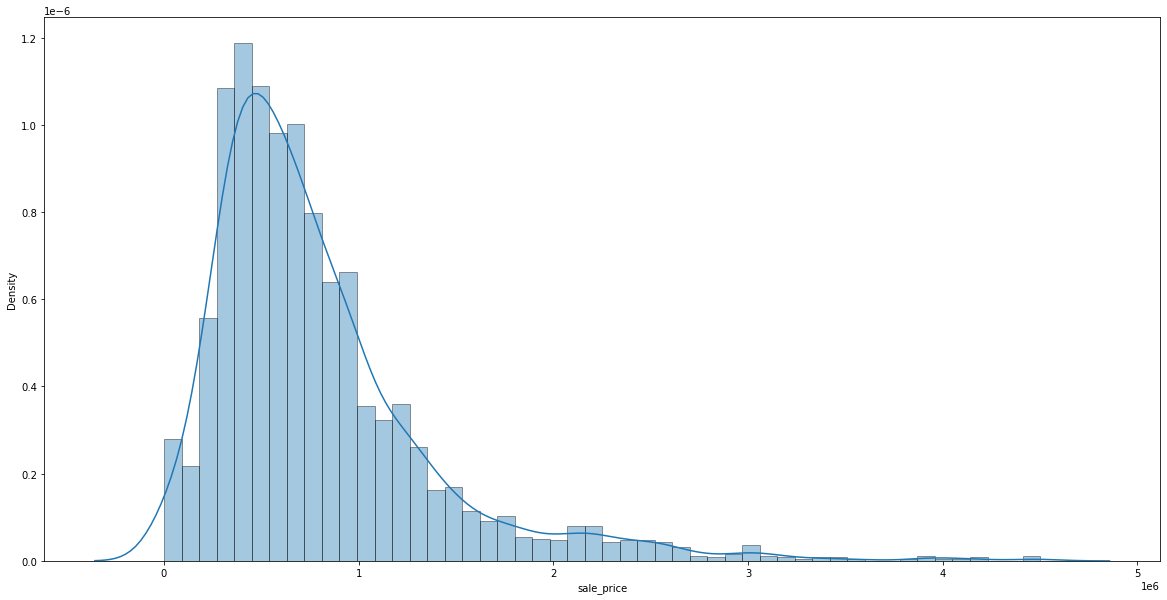

In [48]:
#create distribution plot of property sale prices
plt.figure(figsize = (20,10))
sns.distplot(new_housing['sale_price'], kde = True, hist_kws=dict(edgecolor="k"))


In [49]:
#check datatypes
new_housing.dtypes

borough                                   object
neighborhood                            category
building_class_category                 category
tax_class_at_present                    category
block                                   category
lot                                     category
ease-ment                               category
building_class_at_present               category
address                                 category
apartment_number                        category
zip_code                                category
residential_units                          int64
commercial_units                           int64
total_units                                int64
land_square_feet                         float64
gross_square_feet                        float64
year_built                                 int64
tax_class_at_time_of_sale               category
building_class_at_time_of_sale          category
sale_price                               float64
sale_date           

In [50]:
# Identify categorical features again
new_housing.select_dtypes(['category']).columns

Index(['neighborhood', 'building_class_category', 'tax_class_at_present',
       'block', 'lot', 'ease-ment', 'building_class_at_present', 'address',
       'apartment_number', 'zip_code', 'tax_class_at_time_of_sale',
       'building_class_at_time_of_sale', 'age_category'],
      dtype='object')

### Plots of Categorical Features VS. Sales Price

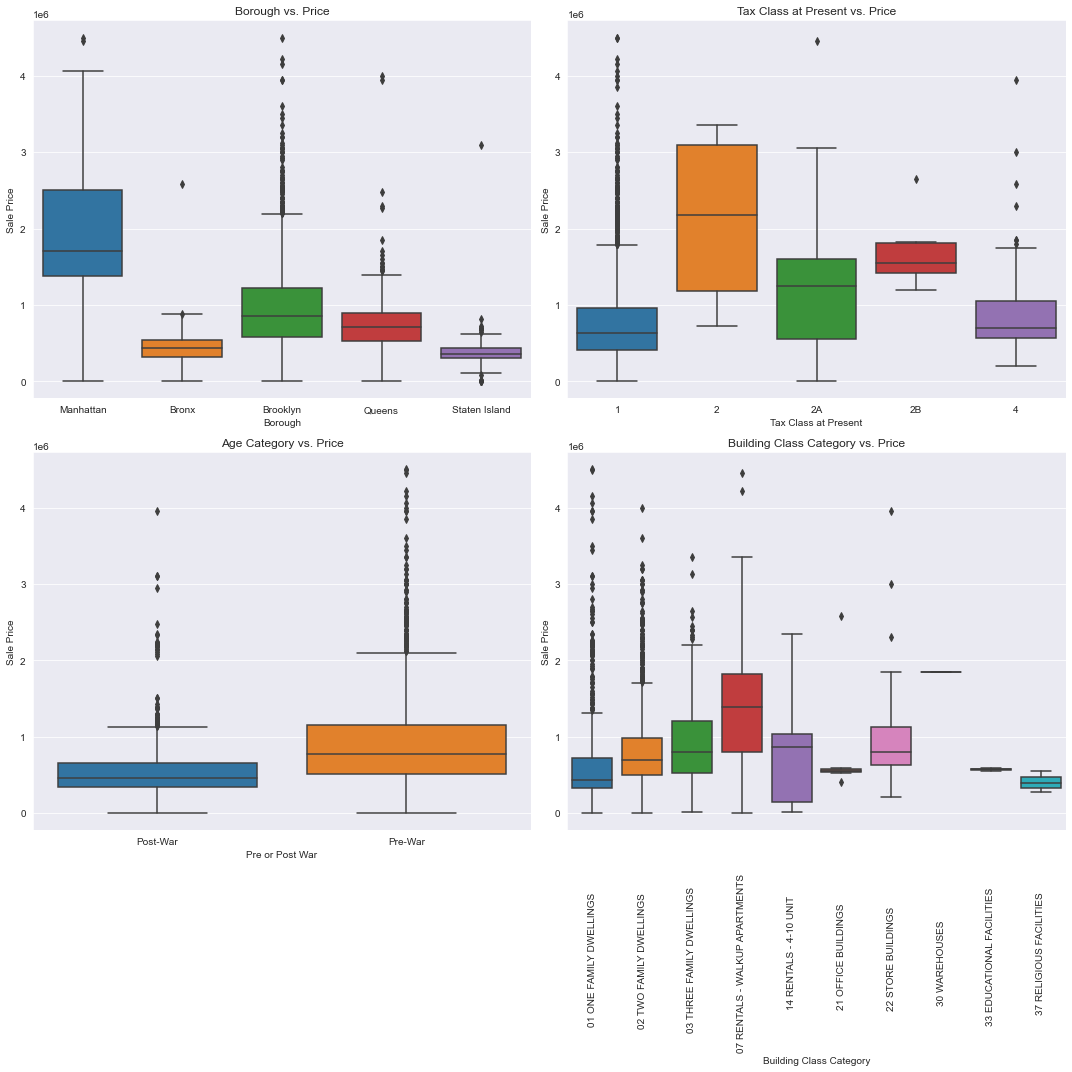

In [51]:
# Suplots of categorical features v price
sns.set_style('darkgrid')
f, axes = plt.subplots(2,2, figsize = (15,15))

#create order variable to plot unique values only
order_tax = sorted(new_housing['tax_class_at_present'].unique())
order_class = sorted(new_housing['building_class_category'].unique())


#plot of borough category vs price
sns.boxplot(x = 'borough', y = 'sale_price', data = new_housing, ax = axes[0,0])
axes[0,0].set_xlabel('Borough')
axes[0,0].set_ylabel('Sale Price')
axes[0,0].set_title('Borough vs. Price')

#plot of tax class at present vs price
sns.boxplot(x = 'tax_class_at_present', y = 'sale_price', data = new_housing, ax = axes[0,1], order = order_tax)
axes[0,1].set_xlabel('Tax Class at Present')
axes[0,1].set_ylabel('Sale Price')
axes[0,1].set_title('Tax Class at Present vs. Price')

#plot of age classification category vs price
sns.boxplot(x = 'age_category', y = 'sale_price', data = new_housing, ax = axes[1,0])
axes[1,0].set_xlabel('Pre or Post War')
axes[1,0].set_ylabel('Sale Price')
axes[1,0].set_title('Age Category vs. Price')

#plot of building class categories vs price
sns.boxplot(x = 'building_class_category', y = 'sale_price', data = new_housing, ax = axes[1,1], order = order_class)
axes[1,1].set_xlabel('Building Class Category')
axes[1,1].set_ylabel('Sale Price')
axes[1,1].set_title('Building Class Category vs. Price')
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

In [52]:
#create new list called 'neighborhood' with top 20 most expensive average sale prices
from collections import Counter
neighborhood = list(dict(Counter(new_housing.neighborhood).most_common(20)).keys())

avg_sale_prices = []
for i in neighborhood:
    avg_price = np.mean(new_housing.sale_price[new_housing.neighborhood == i])
    avg_sale_prices.append(avg_price)


Text(0.5, 1.0, 'Average Property Price in the Top 20 Neighborhoods')

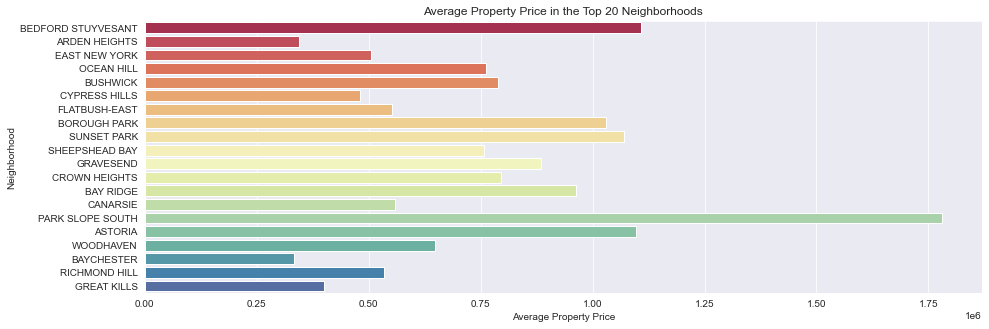

In [53]:
#plot most expensive neighborhoods with highest average property price
plt.figure(figsize=(15,5))

ax = sns.barplot(x= avg_sale_prices, y= neighborhood , ci=None, palette = "Spectral")
ax.set_xlabel('Average Property Price')
ax.set_ylabel('Neighborhood')
plt.title('Average Property Price in the Top 20 Neighborhoods')

Insights

- All boroughs (with the exception of Manhattan) consist of properties with a similar price for properties. Manhattan has the most expensive sale prices with a median sale price at about \\$1.7 million. Brooklyn comes in second with a median price at about \\$900k, and Queens in third with a median price at about $800k. The Bronx and Staten Island have median prices around \\$500k.

- As can be expected, properties identified as Tax Class 2 have the highest median price. Tax Class 2 properties consist of co-ops and condos.

- The median price for pre-War properties (built before 1945) are more expensive (about \\$300k - \\$400k) than properties built post-war.

- The most expensive neighborhood average price of a property is Park Slope South followed by Bedford Stuyvesant and Astoria.


### Plots of Numerical Features VS. Sales Price

In [54]:
new_housing.dtypes

borough                                   object
neighborhood                            category
building_class_category                 category
tax_class_at_present                    category
block                                   category
lot                                     category
ease-ment                               category
building_class_at_present               category
address                                 category
apartment_number                        category
zip_code                                category
residential_units                          int64
commercial_units                           int64
total_units                                int64
land_square_feet                         float64
gross_square_feet                        float64
year_built                                 int64
tax_class_at_time_of_sale               category
building_class_at_time_of_sale          category
sale_price                               float64
sale_date           

Text(0.5, 1.0, 'Residential Units vs Sale Price')

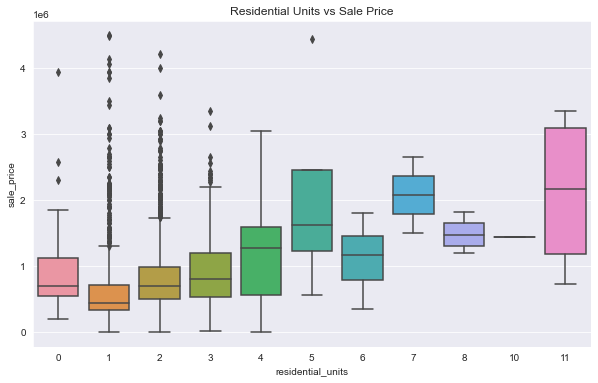

In [55]:
#plot residential units
plt.figure(figsize=(10,6))
sns.boxplot(x='residential_units', y="sale_price", data=new_housing)
plt.title('Residential Units vs Sale Price')

As expected, the median sale price generally increases as residential units increases as well.

Text(0.5, 1.0, 'Commercial Units vs Sale Price')

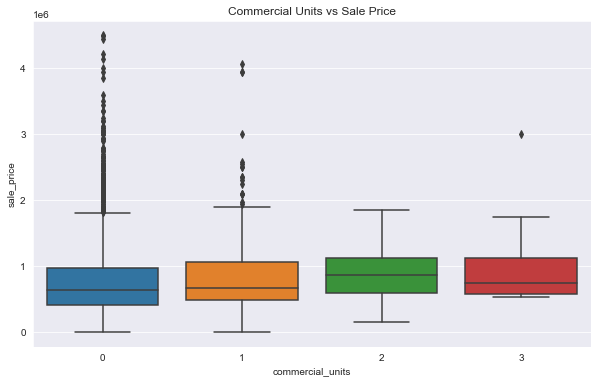

In [56]:
#plot commercial units
plt.figure(figsize=(10,6))
sns.boxplot(x='commercial_units', y="sale_price", data=new_housing)
plt.title('Commercial Units vs Sale Price')


Simiarly, sale prices for commercial units generally increase as the number of units increase.

Text(0.5, 1.0, 'Age vs. Price')

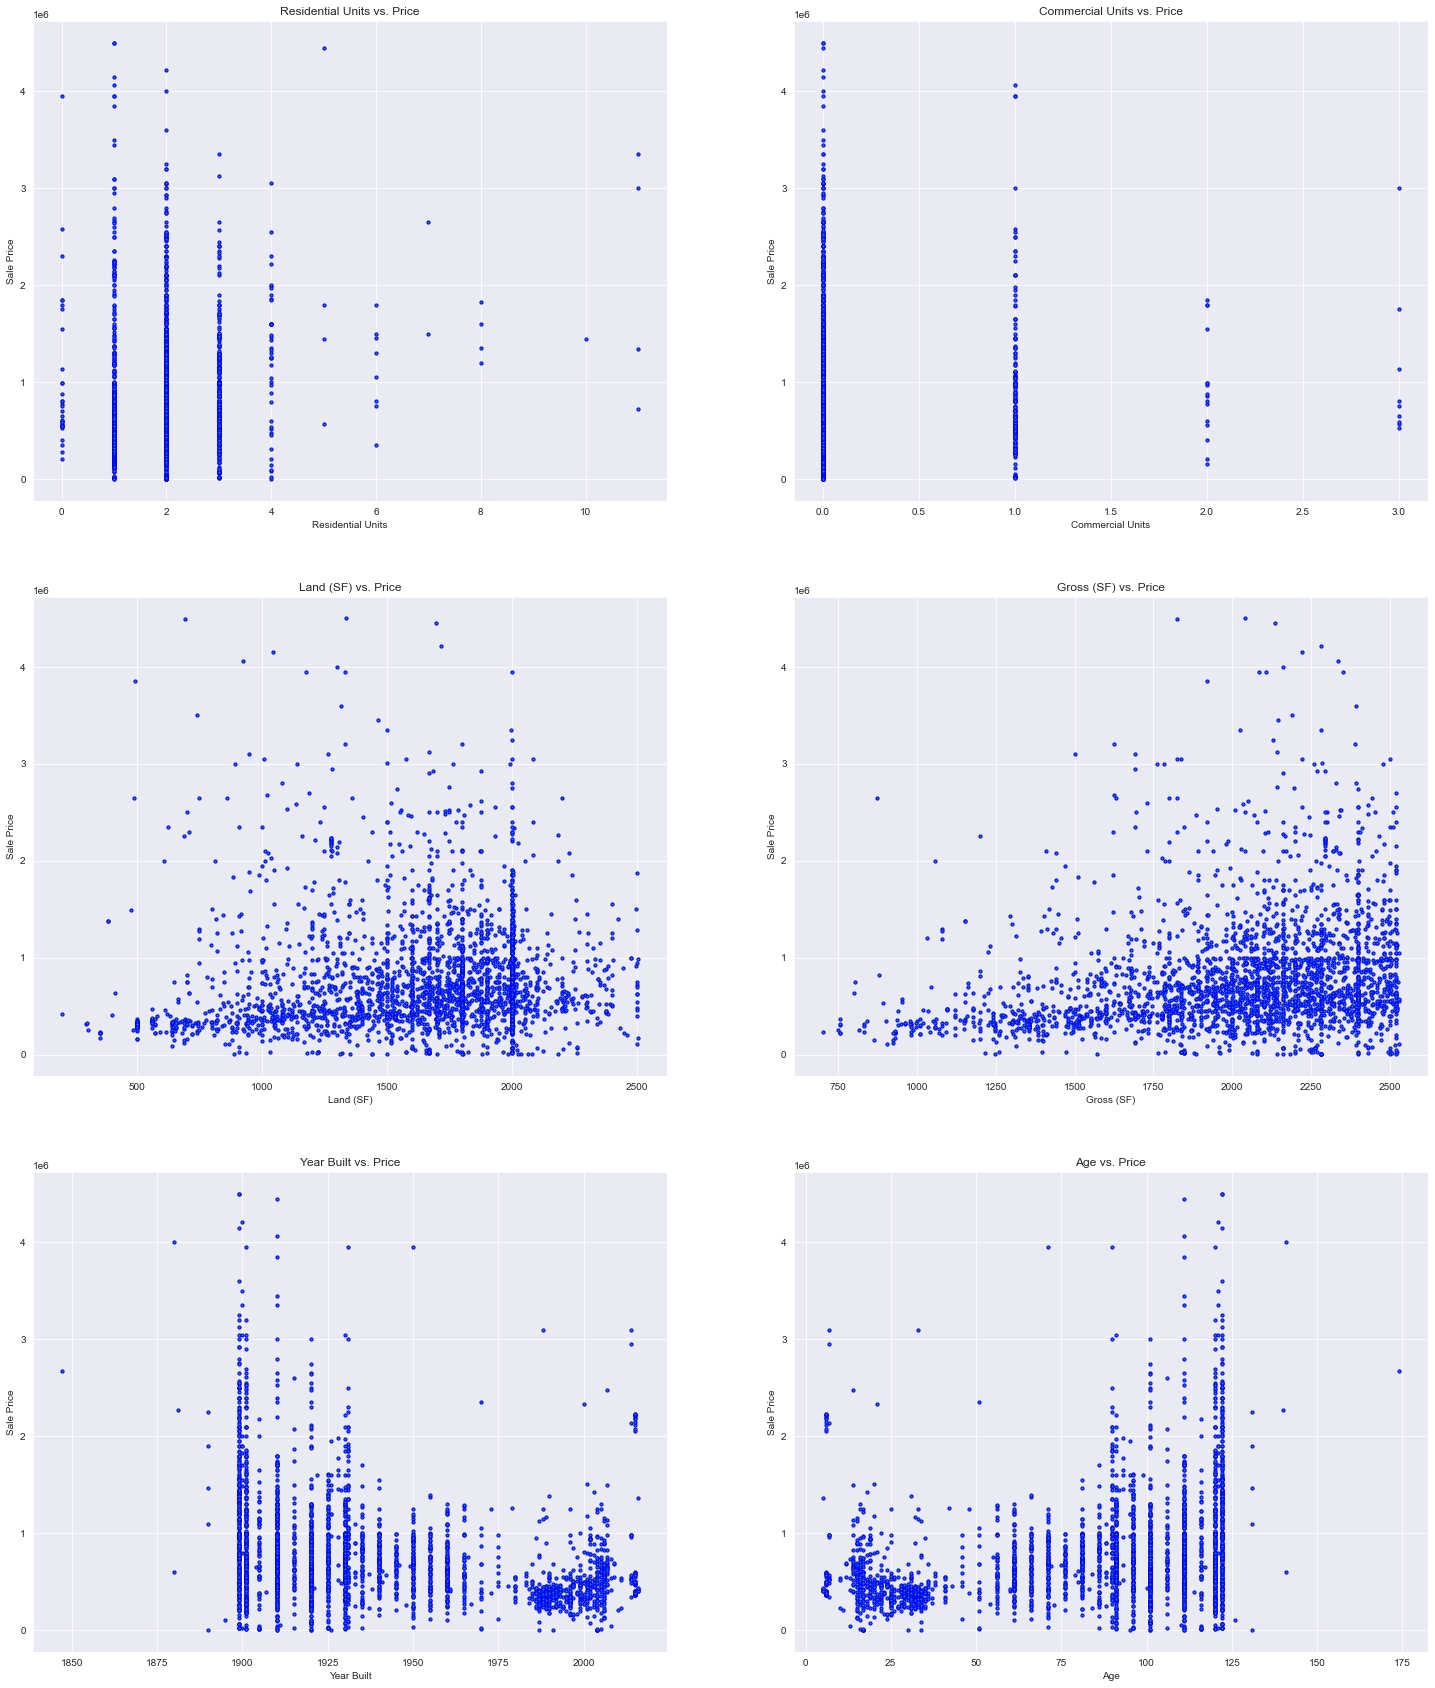

In [57]:
#Suplots of numeric features vs sales price
sns.set_style('darkgrid')
f, axes = plt.subplots(3,2, figsize = (25,30))

# Plot residential units 
axes[0,0].scatter(x = 'residential_units', y = 'sale_price', data = new_housing, edgecolor = 'b', s = 10)
axes[0,0].set_xlabel('Residential Units')
axes[0,0].set_ylabel('Sale Price')
axes[0,0].set_title('Residential Units vs. Price')

# Plot commercial units 
axes[0,1].scatter(x = 'commercial_units', y = 'sale_price', data = new_housing, edgecolor = 'b', s = 10)
axes[0,1].set_xlabel('Commercial Units')
axes[0,1].set_ylabel('Sale Price')
axes[0,1].set_title('Commercial Units vs. Price')

# Plot land square feet
axes[1,0].scatter(x = 'land_square_feet', y = 'sale_price', data = new_housing, edgecolor = 'b', s = 10)
axes[1,0].set_xlabel('Land (SF)')
axes[1,0].set_ylabel('Sale Price')
axes[1,0].set_title('Land (SF) vs. Price')

# Plot gross square feet
axes[1,1].scatter(x = 'gross_square_feet', y = 'sale_price', data = new_housing, edgecolor = 'b', s = 10)
axes[1,1].set_xlabel('Gross (SF)')
axes[1,1].set_ylabel('Sale Price')
axes[1,1].set_title('Gross (SF) vs. Price')

# Plot year built
axes[2,0].scatter(x = 'year_built', y = 'sale_price', data = new_housing, edgecolor = 'b', s = 10)
axes[2,0].set_xlabel('Year Built')
axes[2,0].set_ylabel('Sale Price')
axes[2,0].set_title('Year Built vs. Price')

# Plot age
axes[2,1].scatter(x = 'age', y = 'sale_price', data = new_housing, edgecolor = 'b', s = 10)
axes[2,1].set_xlabel('Age')
axes[2,1].set_ylabel('Sale Price')
axes[2,1].set_title('Age vs. Price')

Insights

- There is a slight positive correlation between the gross square footage of a property and the sale price. This should be expected and makes sense if the property is larger in area.

- There appears to be a general negative correlation between sale price and when the property was built. Newer properties appear to be cheaper than older properties.

### Correlation

Text(0.5, 1.0, 'Variable Correlation')

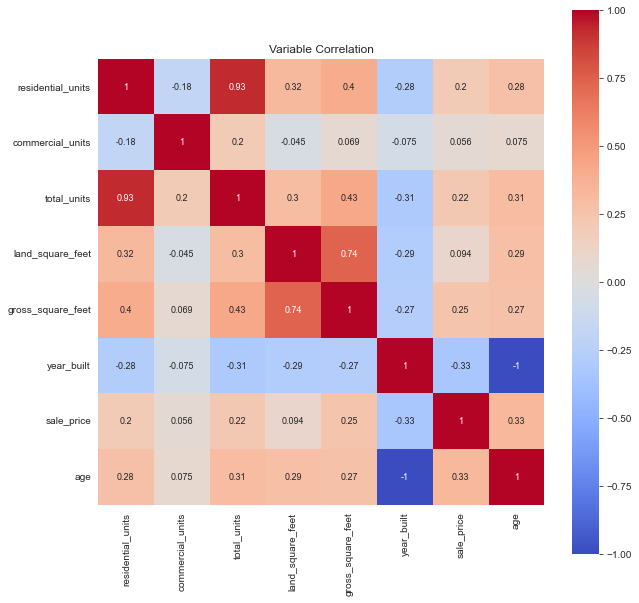

In [58]:
#correlation matrix
corrmat = new_housing.corr()
f, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(corrmat, cmap = 'coolwarm', square=True, annot= True, annot_kws={"size": 9})
plt.title('Variable Correlation')

**Weak Positive Correlation**
1. Residential Units and Price
2. Total Units and Price
3. Gross Square Feet and price

**Moderate Positive Correlation**
1. Age and Price

As can be expected, increases in total units or residentail units is positively correlated with total and gross square footage of a property.

## Statistical Test

hypothesis that we're about to used:

<center>H0: The earlier bult date of the house result in the lower house price</center>
<center>H1: The earlier built date of the house not result in the lower house price</center>

In [82]:
import scipy.stats as stats

X = new_housing['year_built'].array
Y = new_housing['sale_price'].array
result = stats.pearsonr(X,Y)
print(result)

(-0.33033898787714, 9.992687751819284e-73)


As the p-value is shown from the Pearson Correlation test, the p-value is way less than significance level of 0.05. Therefore, we shall **reject null hypothesis** based on the p-value output from Pearson test

<center>H0 : μ(Manhattan) = μ(Bronx) = μ(Brooklyn) = μ(Queens) = μ(Staten_Island)</center>
<center>H1 : All μ are not equal</center>

In [83]:
from statsmodels.formula.api import ols
import statsmodels.api as sm
model_borough = ols('sale_price ~ borough', data = new_housing).fit()
aov_table_1 = sm.stats.anova_lm(model_borough)

In [84]:
aov_table_1

,df,sum_sq,mean_sq,F,PR(>F)
borough,4.0,2.281343e+14,5.703357e+13,220.92093,4.540980e-165
Residual,2813.0,7.262119e+14,2.581628e+11,NaN,NaN


Because the results of the ANOVA test state that the *p-value is > 0.05*, the decision obtained is to **fail to reject H0**, where there is no significant difference between sale_price with boroughs

## Regression Model single model with feature age

In [85]:
# Create OLS model object
model = smf.ols("sale_price ~ age", new_housing)

# Fit the model
results_model = model.fit()

# Extract the results (Coefficient and Standard Error) to DataFrame
results_sales1 = print_coef_std_err(results_model)

In [86]:
round(results_sales1,2)

,coef,std err
Intercept,366138.81,25073.24
age,5208.22,280.43


<center>Sale Price = 366138.81 + (age x 357809.07) </center>

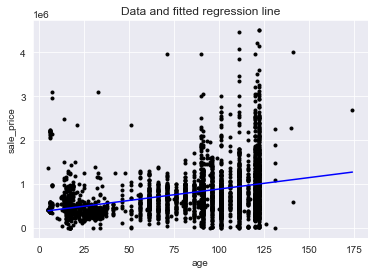

In [87]:
predictor = "age"
outcome = "sale_price"
data = new_housing.copy()
results_ = results_sales1.copy()

# Plot the data
plt.scatter(data[predictor], data[outcome], color = "k", marker=".")

# Calculate the fitted values
a_hat = results_.loc["Intercept"]["coef"]
b_hat = results_.loc[predictor]["coef"]

x_domain = np.linspace(np.min(data[predictor]), np.max(data[predictor]), 10000)

fitted_values = a_hat + b_hat * x_domain

# Plot the fitted line
plt.plot(x_domain, fitted_values, label="Fitted line", color = "b")

# Add a legend and labels
# plt.legend()
plt.ylabel(outcome)
plt.xlabel(predictor)

# Add a title and adjust the margins
plt.title("Data and fitted regression line")

# Show the plot
plt.show()